# Problem Statment 

This dataset includes details of applicants who have applied for loan in order to make algorithm to predict that whether the loan of the applocant will be approved or not on the basis of dataset . The dataset includes details like credit history, loan amount, their income, dependents etc.

 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status



# importing neccesary libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stat
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings("ignore")

# importing the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This dataset includes details of applicants who have applied for loan and target variable which is descriptive so the problem is Classification type of priblem.

# Exploratory data analysis (EDA)

In [4]:
#cheking dimention of dataset
df.shape

(614, 13)

Dataset contain 614 rows and  13 columns

In [5]:
#cheking type of dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#to get good overviews of data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dataset  have decsriptive data so we need to encode it.

In [7]:
#checking number of unique values in dataset
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
#cheking is there anu null value or not 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

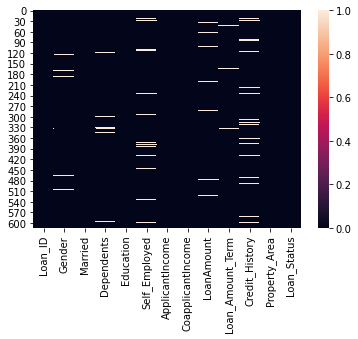

In [9]:
#Lets visualize null value clearly
sns.heatmap(df.isnull())

so the dataset have null values in the columns Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History ,

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#cheking which columns are present in dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
#list of values in target variable
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
#cheking weather the dataset contains any spaces
df.loc[df["Loan_Status"]==""]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


# Description of Data set

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
#fill the missing values in numerical term - mean
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mean())

In [16]:
#fill the missing values for catogarical data - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there is no any null value present in the dataset

<AxesSubplot:>

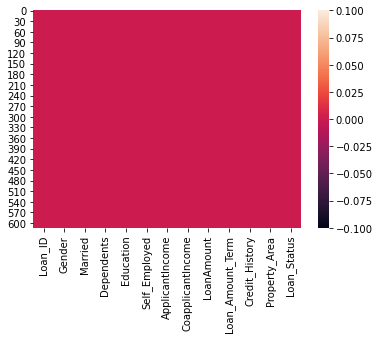

In [18]:
#Lets visualize null value clearly
sns.heatmap(df.isnull())

Now there is no null value present in dataset.

In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This gives statistical information of the dataset.There is no any negative or invalid values in dataset.
so from above we can conclude
There is no any null value since the count of all columns is same.


<AxesSubplot:>

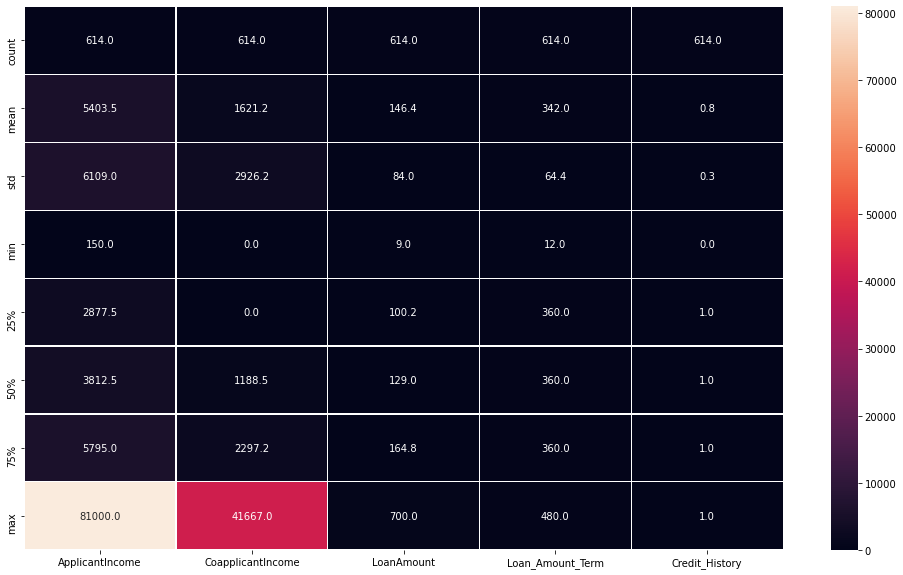

In [20]:
#visalizing from column from heatmap
plt.figure(figsize=(17,10))
sns.heatmap(df.describe(),linewidth=0.1,fmt="0.1f",annot=True)

This is hest map to visualize the summary statistics

# DATA VISUALIZATION

<AxesSubplot:xlabel='Gender', ylabel='count'>

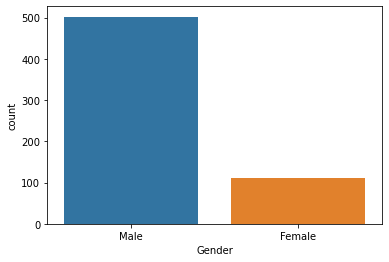

In [21]:
sns.countplot(df["Gender"])

We can see here most of the applicant are male and very few are female

<AxesSubplot:xlabel='Married', ylabel='count'>

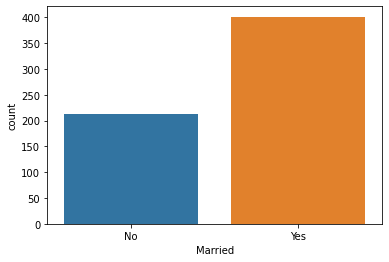

In [22]:
sns.countplot(df["Married"])

we can say that most of the applicant are married and some are non married i.e 200

<AxesSubplot:xlabel='Dependents', ylabel='count'>

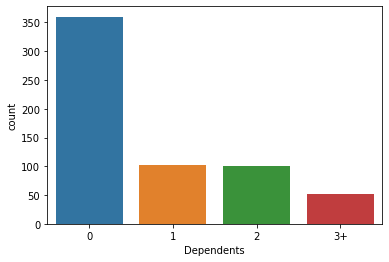

In [23]:
sns.countplot(df["Dependents"])

we can say most of the people are have no dependents and 100 are have 1  ,100 have 2, 50 have 3 plus

<AxesSubplot:xlabel='Education', ylabel='count'>

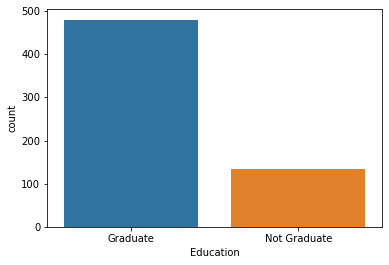

In [24]:
sns.countplot(df["Education"])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

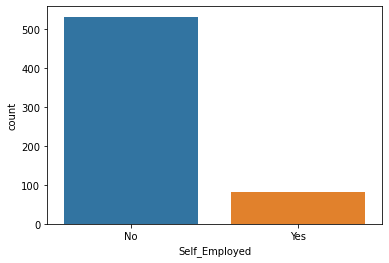

In [25]:
sns.countplot(df["Self_Employed"])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

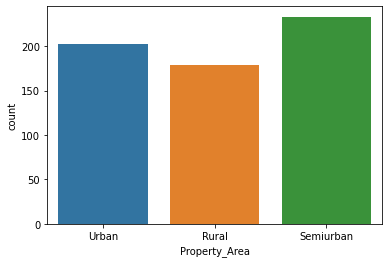

In [26]:
sns.countplot(df["Property_Area"])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

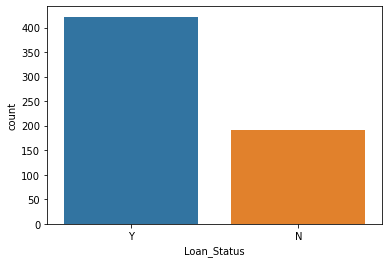

In [27]:
sns.countplot(df["Loan_Status"])

We can see here that most of the loan applications are approved.Also some are rejected.

So these are for catogerical data.

In [28]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

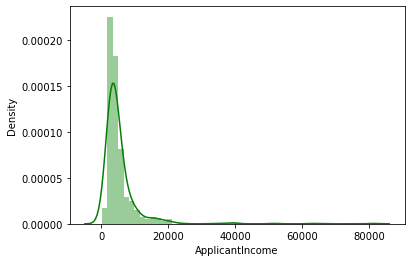

In [29]:
#Now we will move to numerical attributes for data visualization
#how data is distributed to each colomn
sns.distplot(df['ApplicantIncome'],color = 'green')      
plt.show()

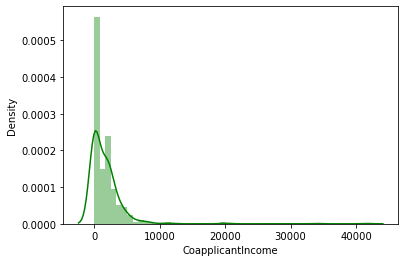

In [30]:
sns.distplot(df['CoapplicantIncome'],color = 'green')      
plt.show()

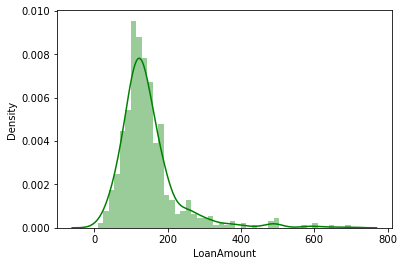

In [31]:
sns.distplot(df['LoanAmount'],color = 'green')      
plt.show()

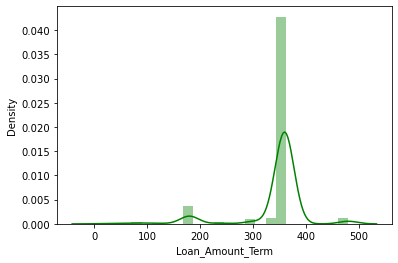

In [32]:
sns.distplot(df['Loan_Amount_Term'],color = 'green')      
plt.show()

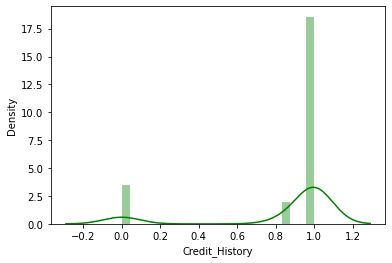

In [33]:
sns.distplot(df['Credit_History'],color = 'green')      
plt.show()

We can see the skewness present in the coloumns

so we will remove it

In [34]:
df['Total_income'] = df ['ApplicantIncome'] + df['CoapplicantIncome'] 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


<AxesSubplot:xlabel='ApplicantIncome_Log', ylabel='Density'>

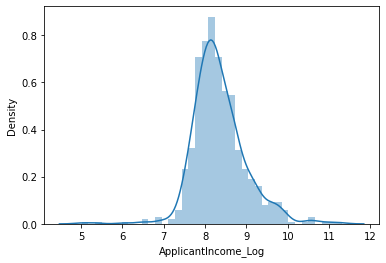

In [35]:
df['ApplicantIncome_Log'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome_Log'])

<AxesSubplot:xlabel='CoapplicantIncome_Log', ylabel='Density'>

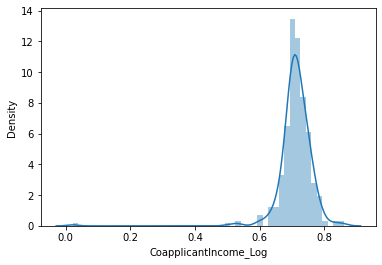

In [49]:
df['CoapplicantIncome_Log'] = np.log(df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncome_Log'])

<AxesSubplot:xlabel='LoanAmount_Log', ylabel='Density'>

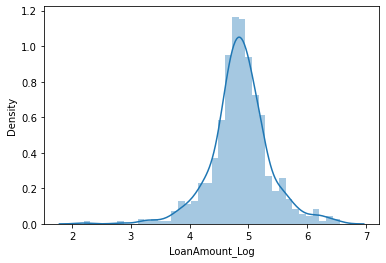

In [50]:
df['LoanAmount_Log'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount_Log'])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

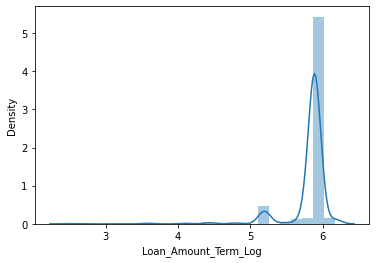

In [51]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'])

<AxesSubplot:xlabel='Total_income_Log', ylabel='Density'>

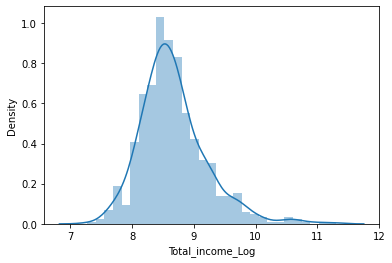

In [52]:
df['Total_income_Log'] = np.log(df['Total_income'])
sns.distplot(df['Total_income_Log'])

# correlation matrix

In [53]:
corr = df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_income_Log
ApplicantIncome,1.000000,0.097171,0.565620,-0.045242,-0.014477,0.893037,0.790532,0.086629,0.434849,-0.024085,0.717829
CoapplicantIncome,0.097171,1.000000,0.371593,-0.067643,-0.066682,0.502527,0.021921,0.987790,0.356187,-0.047641,0.578579
LoanAmount,0.565620,0.371593,1.000000,0.038801,-0.007738,0.620102,0.551556,0.329792,0.895324,0.044905,0.687552
Loan_Amount_Term,-0.045242,-0.067643,0.038801,1.000000,0.001395,-0.069830,-0.030739,-0.059499,0.086531,0.938871,-0.055320
Credit_History,-0.014477,-0.066682,-0.007738,0.001395,1.000000,-0.014447,0.019169,-0.065477,-0.025248,-0.007860,0.019156
Total_income,0.893037,0.502527,0.620102,-0.069830,-0.014447,1.000000,0.639953,0.437783,0.503817,-0.042237,0.852873
ApplicantIncome_Log,0.790532,0.021921,0.551556,-0.030739,0.019169,0.639953,1.000000,0.020851,0.491066,-0.014618,0.740300
CoapplicantIncome_Log,0.086629,0.987790,0.329792,-0.059499,-0.065477,0.437783,0.020851,1.000000,0.319904,-0.042183,0.516367
LoanAmount_Log,0.434849,0.356187,0.895324,0.086531,-0.025248,0.503817,0.491066,0.319904,1.000000,0.084534,0.657507
Loan_Amount_Term_Log,-0.024085,-0.047641,0.044905,0.938871,-0.007860,-0.042237,-0.014618,-0.042183,0.084534,1.000000,-0.029522


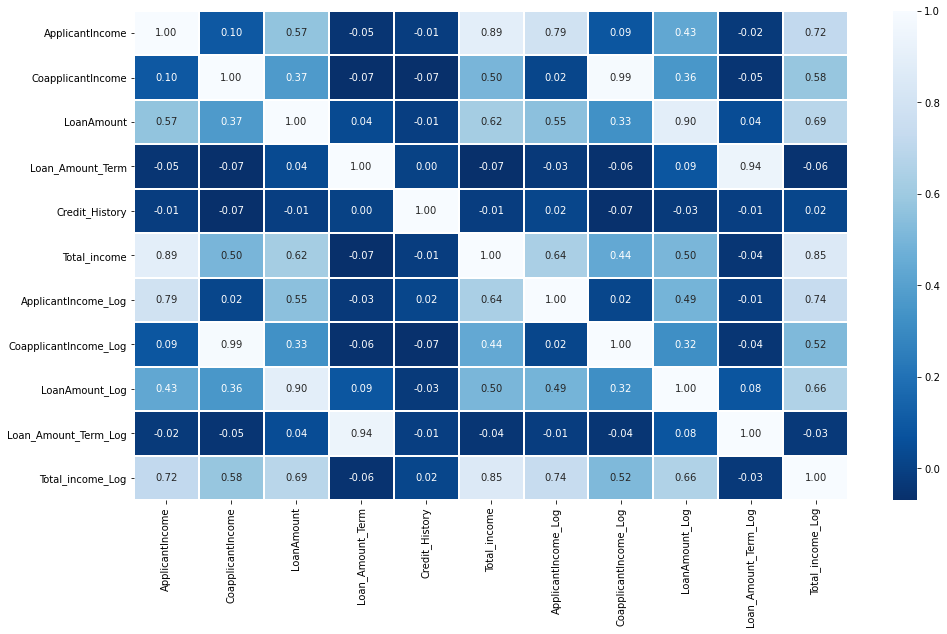

In [54]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths =1 ,fmt ='0.2f',cmap="Blues_r", annot=True )
plt.yticks(rotation=0);

In [55]:
#lets drop unneccesary columns
col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Total_income','Loan_ID','CoapplicantIncome_Log']
df = df.drop(columns=col , axis= 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


# Label Encoding

In [56]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncome_Log',
       'LoanAmount_Log', 'Loan_Amount_Term_Log', 'Total_income_Log'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder 
Le = LabelEncoder()
cols = ['Gender', 'Married',  'Education', 'Self_Employed','Property_Area', 'Loan_Status','Dependents']

for col in cols:
    df[col] = Le.fit_transform(df[col])

In [58]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Seprating the Dependent and Independent variables

In [59]:
x = df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]

In [60]:
x.shape

(614, 11)

In [61]:
y.shape

(614,)

In [62]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_income_Log
0,1,0,0,0,0,1.0,2,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,8.699515,4.948760,5.886104,8.699515


# Model building

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size =0.25, random_state = 42 )

In [64]:
#classify function
def classify (model, x , y):
    x_train , x_test , y_train , y_test =train_test_split(x,y,test_size =0.25, random_state = 42)
    model.fit(x_train , y_train)
    print('Accuracy is',model.score(x_test,y_test)*100)
    # cross validattion 
    score = cross_val_score(model, x, y, cv=5)
    print("cross validation is",np.mean(score)*100)


In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy is 77.27272727272727
cross validation is 80.9462881514061


In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier ()
classify(model,x,y)

Accuracy is 72.72727272727273
cross validation is 71.01426096228175


In [67]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier ()
classify(model,x,y)

Accuracy is 77.27272727272727
cross validation is 79.32027189124351


In [68]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier ()
classify(model,x,y)

Accuracy is 75.97402597402598
cross validation is 77.20378515260562


# Hyperparameter tuning

In [69]:
model = RandomForestClassifier (n_estimators = 100 , min_samples_split = 25 , max_depth= 7,max_features=1)
classify(model,x,y)

Accuracy is 77.27272727272727
cross validation is 80.45581767293083


In [70]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test , y_pred)
cm

array([[25, 29],
       [ 5, 95]], dtype=int64)

<AxesSubplot:>

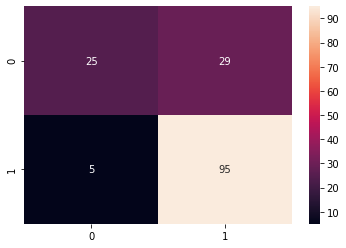

In [72]:
sns.heatmap(cm, annot=True)

Here we are predicted Digonal values are predicted correctly for no we predicted 23 VALUES AND For yes we predicted 94 values 